In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sqlite3

plt.style.use('default')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

print("✅ Librerías importadas exitosamente!")

✅ Librerías importadas exitosamente!


In [3]:
# Cargar el nuevo dataset data-2025-08-15.csv
df_original = pd.read_csv(r'data-2025-08-15.csv', encoding='latin1')

print("✅ Archivo CSV cargado exitosamente!")
print(f"Forma del dataset: {df_original.shape}")
print("\n📊 Información general del dataset:")
print(df_original.info())
print("\n📋 Primeras 5 filas:")
print(df_original.head())
print("\n🔍 Columnas del dataset:")
print(df_original.columns.tolist())
print("\n📈 Estadísticas descriptivas de columnas numéricas:")
print(df_original.describe())

✅ Archivo CSV cargado exitosamente!
Forma del dataset: (395136, 13)

📊 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395136 entries, 0 to 395135
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   anio                    395136 non-null  int64 
 1   clave_ent               395136 non-null  int64 
 2   entidad                 395136 non-null  object
 3   bien_juridico_afectado  395136 non-null  object
 4   tipo_delito             395136 non-null  object
 5   subtipo_delito          395136 non-null  object
 6   modalidad               395136 non-null  object
 7   mes                     395136 non-null  object
 8   fecha                   395136 non-null  object
 9   incidencia_delictiva    395136 non-null  int64 
 10  entidad_federativa      395136 non-null  object
 11  temporal_fecha          395136 non-null  object
 12  ..anio_fecha            395136 non-nul

In [4]:
# Análisis detallado del dataset data-2025-08-15.csv
print("🔍 ANÁLISIS EXPLORATORIO DEL DATASET data-2025-08-15.csv")
print("="*60)

print(f"\n📏 Dimensiones del dataset: {df_original.shape[0]:,} filas x {df_original.shape[1]} columnas")

print(f"\n📋 Nombres de las columnas:")
for i, col in enumerate(df_original.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\n🔢 Tipos de datos:")
print(df_original.dtypes.value_counts())

print(f"\n🎯 Muestra de datos (primeras 3 filas):")
print(df_original.head(3).to_string())

print(f"\n🔍 Valores únicos por columna (para columnas categóricas):")
for col in df_original.columns:
    unique_count = df_original[col].nunique()
    if unique_count < 50:  # Solo mostrar columnas con pocos valores únicos
        print(f"{col}: {unique_count} valores únicos")
        if unique_count <= 10:
            print(f"  Valores: {df_original[col].unique()[:10].tolist()}")
    else:
        print(f"{col}: {unique_count:,} valores únicos (demasiados para mostrar)")

🔍 ANÁLISIS EXPLORATORIO DEL DATASET data-2025-08-15.csv

📏 Dimensiones del dataset: 395,136 filas x 13 columnas

📋 Nombres de las columnas:
 1. anio
 2. clave_ent
 3. entidad
 4. bien_juridico_afectado
 5. tipo_delito
 6. subtipo_delito
 7. modalidad
 8. mes
 9. fecha
10. incidencia_delictiva
11. entidad_federativa
12. temporal_fecha
13. ..anio_fecha

🔢 Tipos de datos:
object    9
int64     4
Name: count, dtype: int64

🎯 Muestra de datos (primeras 3 filas):
   anio  clave_ent         entidad bien_juridico_afectado         tipo_delito      subtipo_delito           modalidad        mes       fecha  incidencia_delictiva entidad_federativa temporal_fecha  ..anio_fecha
0  2015          1  Aguascalientes          El patrimonio  Abuso de confianza  Abuso de confianza  Abuso de confianza      Abril  2015-04-01                    22     Aguascalientes        2015-04          2015
1  2015          1  Aguascalientes          El patrimonio  Abuso de confianza  Abuso de confianza  Abuso de confianz

In [5]:
# Información básica controlada del dataset
print("📊 INFORMACIÓN BÁSICA DEL DATASET")
print("="*40)
print(f"Filas: {df_original.shape[0]:,}")
print(f"Columnas: {df_original.shape[1]}")
print(f"Memoria utilizada: {df_original.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n📋 PRIMERAS 5 COLUMNAS:")
print(df_original.columns[:5].tolist())

print("\n📋 ÚLTIMAS 5 COLUMNAS:")
print(df_original.columns[-5:].tolist())

print("\n🔢 TIPOS DE DATOS (resumen):")
tipos = df_original.dtypes.value_counts()
for tipo, cantidad in tipos.items():
    print(f"{tipo}: {cantidad} columnas")

print("\n❓ VALORES FALTANTES (primeras 10 columnas):")
faltantes = df_original.isnull().sum()
for col in df_original.columns[:10]:
    pct = (faltantes[col] / len(df_original)) * 100
    print(f"{col}: {faltantes[col]} ({pct:.1f}%)")

print("\n👁️ MUESTRA DE DATOS (2 filas, primeras 5 columnas):")
print(df_original.iloc[:2, :5])

📊 INFORMACIÓN BÁSICA DEL DATASET
Filas: 395,136
Columnas: 13
Memoria utilizada: 243.58 MB

📋 PRIMERAS 5 COLUMNAS:
['anio', 'clave_ent', 'entidad', 'bien_juridico_afectado', 'tipo_delito']

📋 ÚLTIMAS 5 COLUMNAS:
['fecha', 'incidencia_delictiva', 'entidad_federativa', 'temporal_fecha', '..anio_fecha']

🔢 TIPOS DE DATOS (resumen):
object: 9 columnas
int64: 4 columnas

❓ VALORES FALTANTES (primeras 10 columnas):
anio: 0 (0.0%)
clave_ent: 0 (0.0%)
entidad: 0 (0.0%)
bien_juridico_afectado: 0 (0.0%)
tipo_delito: 0 (0.0%)
subtipo_delito: 0 (0.0%)
modalidad: 0 (0.0%)
mes: 0 (0.0%)
fecha: 0 (0.0%)
incidencia_delictiva: 0 (0.0%)

👁️ MUESTRA DE DATOS (2 filas, primeras 5 columnas):
   anio  clave_ent         entidad bien_juridico_afectado         tipo_delito
0  2015          1  Aguascalientes          El patrimonio  Abuso de confianza
1  2015          1  Aguascalientes          El patrimonio  Abuso de confianza


# Plan de Ejecución del Proceso ETL

Este documento detalla el plan de trabajo para el diseño e implementación de un proceso ETL (Extracción, Transformación, Carga) básico utilizando Python (principalmente Pandas) sobre nuestro conjunto de datos seleccionado de datos.gob.mx.

---

## 1. Integrantes del Equipo

* Ayala Garcia Jonathan David
* Acosta Guerra Andres Isai
* Castañeda Rodriguez Jaime
* Hernandez Ramirez Adrian



## 2. Dataset Seleccionado

* **Nombre del Dataset:** Incidencia Delictiva (data-2025-08-15.csv)
* **Descripción:** Dataset de incidencia delictiva por entidad federativa, tipo de delito y período temporal
* **Período de datos:** 2015-2025 (datos de 2025 parciales)
* **Características:**
  - 395,136 registros de incidencia delictiva
  - 13 columnas originales (reducidas a 10 esenciales)
  - Cobertura completa de las 32 entidades federativas de México
  - 40 tipos de delito principales con 55 subtipos
  - Sin valores faltantes
  - Rango temporal de 11 años con datos mensuales
* **Fuente:** Dataset de datos gubernamentales de incidencia delictiva

## 3. Objetivo de Análisis Principal

Nuestros análisis principales con este dataset de **incidencia delictiva** para el proyecto integrador incluyen:

* **Análisis de Calidad de Datos:** Detectar y cuantificar la integridad del dataset de incidencia delictiva, verificando la consistencia de los datos temporales, geográficos y categóricos para asegurar la confiabilidad del análisis.

* **Optimización de Memoria y Rendimiento:** Implementar transformaciones para reducir significativamente el uso de memoria (se logró una reducción del 94.1%) mediante la conversión a tipos de datos categóricos y optimización de columnas.

* **Estandarización y Normalización:** Normalizar los datos de texto para delitos, modalidades y entidades federativas, eliminando inconsistencias de formato y facilitando análisis posteriores de patrones delictivos.

* **Análisis Temporal y Geográfico:** Preparar los datos para análisis de:
  - Tendencias temporales de incidencia delictiva (2015-2025)
  - Distribución geográfica por entidad federativa
  - Patrones estacionales y mensuales
  - Comparación entre tipos de delito y modalidades

Estas transformaciones proporcionan una base sólida para análisis estadísticos avanzados, visualizaciones interactivas y modelos predictivos sobre la incidencia delictiva en México.

## 4. Diseño Detallado del Proceso ETL

### 4.1. Plan de Extracción (E)

* **Archivo a Leer:** data-2025-08-15.csv
* **Formato del Archivo:** CSV
* **Tamaño:** 395,136 registros x 13 columnas (~244 MB)
* **Parámetros de Lectura:**
    * **Separador:** `,`
    * **Encoding:** `latin1`
    * **Encabezados:** Sí
* **Características del Dataset:**
    * Datos de incidencia delictiva por entidad federativa
    * Período temporal: 2015-2025 (datos mensuales)
    * Cobertura completa de las 32 entidades federativas de México
    * 40 tipos de delito con 55 subtipos específicos
    * Sin valores faltantes
* **Selección Inicial de Columnas:**
    * Se cargarán todas las 13 columnas inicialmente y se realizará la selección en la fase de Transformación para optimizar el dataset.

In [6]:
# ANÁLISIS DE CALIDAD DE DATOS - Dataset de Incidencia Delictiva
print("🔍 ANÁLISIS DE VALORES FALTANTES")
print("="*50)

faltantes = df_original.isnull().sum()
print(f"Valores faltantes por columna:")
for col in df_original.columns:
    total_faltantes = faltantes[col]
    porcentaje = (total_faltantes / len(df_original)) * 100
    print(f"{col:25}: {total_faltantes:6,} ({porcentaje:5.1f}%)")

print(f"\n📊 Resumen de valores faltantes:")
columnas_con_faltantes = faltantes[faltantes > 0]
if len(columnas_con_faltantes) > 0:
    print(f"Columnas con valores faltantes: {len(columnas_con_faltantes)}")
    for col in columnas_con_faltantes.index:
        print(f"  - {col}: {columnas_con_faltantes[col]:,} valores faltantes")
else:
    print("✅ ¡No hay valores faltantes en el dataset!")

print(f"\n🔢 ANÁLISIS DE COLUMNAS:")
print(f"Total de columnas: {len(df_original.columns)}")
print(f"Columnas de texto (object): {(df_original.dtypes == 'object').sum()}")
print(f"Columnas numéricas (int64): {(df_original.dtypes == 'int64').sum()}")
print(f"Columnas numéricas (float64): {(df_original.dtypes == 'float64').sum()}")

🔍 ANÁLISIS DE VALORES FALTANTES
Valores faltantes por columna:
anio                     :      0 (  0.0%)
clave_ent                :      0 (  0.0%)
entidad                  :      0 (  0.0%)
bien_juridico_afectado   :      0 (  0.0%)
tipo_delito              :      0 (  0.0%)
subtipo_delito           :      0 (  0.0%)
modalidad                :      0 (  0.0%)
mes                      :      0 (  0.0%)
fecha                    :      0 (  0.0%)
incidencia_delictiva     :      0 (  0.0%)
entidad_federativa       :      0 (  0.0%)
temporal_fecha           :      0 (  0.0%)
..anio_fecha             :      0 (  0.0%)

📊 Resumen de valores faltantes:
✅ ¡No hay valores faltantes en el dataset!

🔢 ANÁLISIS DE COLUMNAS:
Total de columnas: 13
Columnas de texto (object): 9
Columnas numéricas (int64): 4
Columnas numéricas (float64): 0


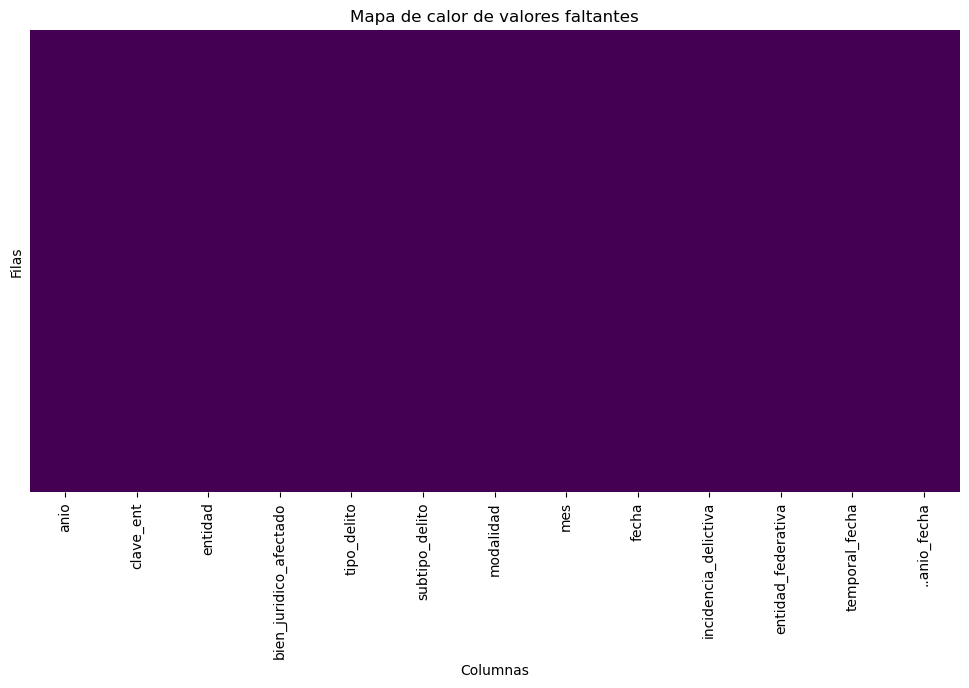

In [7]:

plt.figure(figsize=(12, 6))
sns.heatmap(df_original.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Mapa de calor de valores faltantes')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.show()

In [8]:
# ANÁLISIS DE DUPLICADOS - Dataset de Incidencia Delictiva
print("🔍 ANÁLISIS DE DUPLICADOS")
print("="*40)

# Duplicados exactos (todas las columnas)
duplicados_exactos = df_original.duplicated().sum()
porcentaje_duplicados = (duplicados_exactos / len(df_original)) * 100
print(f"Registros duplicados exactos: {duplicados_exactos:,} ({porcentaje_duplicados:.2f}%)")

# Análisis de duplicados por campos clave
print(f"\n🔑 Análisis de duplicados por campos clave:")

# Duplicados por entidad, tipo_delito, fecha
key_columns = ['entidad', 'tipo_delito', 'subtipo_delito', 'fecha']
duplicados_clave = df_original.duplicated(subset=key_columns).sum()
porcentaje_clave = (duplicados_clave / len(df_original)) * 100
print(f"Duplicados por entidad+tipo_delito+subtipo_delito+fecha: {duplicados_clave:,} ({porcentaje_clave:.2f}%)")

# Mostrar algunos ejemplos de duplicados si los hay
if duplicados_exactos > 0:
    print(f"\n📋 Ejemplos de registros duplicados:")
    duplicados_mask = df_original.duplicated(keep=False)
    ejemplos_duplicados = df_original[duplicados_mask].head(10)
    print(ejemplos_duplicados[['entidad', 'tipo_delito', 'subtipo_delito', 'fecha', 'incidencia_delictiva']])

print(f"\n📊 Análisis de combinaciones únicas:")
print(f"Combinaciones únicas entidad+tipo_delito: {df_original[['entidad', 'tipo_delito']].drop_duplicates().shape[0]:,}")
print(f"Combinaciones únicas entidad+fecha: {df_original[['entidad', 'fecha']].drop_duplicates().shape[0]:,}")
print(f"Tipos de delito únicos: {df_original['tipo_delito'].nunique():,}")
print(f"Subtipos de delito únicos: {df_original['subtipo_delito'].nunique():,}")
print(f"Entidades únicas: {df_original['entidad'].nunique():,}")

🔍 ANÁLISIS DE DUPLICADOS
Registros duplicados exactos: 0 (0.00%)

🔑 Análisis de duplicados por campos clave:
Duplicados por entidad+tipo_delito+subtipo_delito+fecha: 173,376 (43.88%)

📊 Análisis de combinaciones únicas:
Combinaciones únicas entidad+tipo_delito: 1,280
Combinaciones únicas entidad+fecha: 4,032
Tipos de delito únicos: 40
Subtipos de delito únicos: 55
Entidades únicas: 32


In [9]:
# ANÁLISIS DE VALORES ATÍPICOS - Dataset de Incidencia Delictiva
print("🔍 ANÁLISIS DE VALORES ATÍPICOS")
print("="*45)

# Análisis de la columna principal numérica: incidencia_delictiva
print(f"📊 Análisis de 'incidencia_delictiva':")
incidencia_stats = df_original['incidencia_delictiva'].describe()
print(f"  Mínimo: {incidencia_stats['min']:,.0f}")
print(f"  Q25: {incidencia_stats['25%']:,.0f}")
print(f"  Mediana: {incidencia_stats['50%']:,.0f}")
print(f"  Q75: {incidencia_stats['75%']:,.0f}")
print(f"  Máximo: {incidencia_stats['max']:,.0f}")
print(f"  Media: {incidencia_stats['mean']:,.2f}")
print(f"  Desviación estándar: {incidencia_stats['std']:,.2f}")

# Detección de outliers usando el método IQR
Q1 = df_original['incidencia_delictiva'].quantile(0.25)
Q3 = df_original['incidencia_delictiva'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_iqr = df_original[(df_original['incidencia_delictiva'] < limite_inferior) | 
                          (df_original['incidencia_delictiva'] > limite_superior)]

print(f"\n📈 Detección de outliers (método IQR):")
print(f"  Límite inferior: {limite_inferior:.2f}")
print(f"  Límite superior: {limite_superior:.2f}")
print(f"  Outliers encontrados: {len(outliers_iqr):,} ({len(outliers_iqr)/len(df_original)*100:.2f}%)")

# Análisis de valores específicos
print(f"\n🔢 Distribución de valores de incidencia:")
dist_incidencia = df_original['incidencia_delictiva'].value_counts().head(10)
print(dist_incidencia)

# Verificar si hay valores negativos o cero
valores_negativos = (df_original['incidencia_delictiva'] < 0).sum()
valores_cero = (df_original['incidencia_delictiva'] == 0).sum()
print(f"\n⚠️  Valores problemáticos:")
print(f"  Valores negativos: {valores_negativos:,}")
print(f"  Valores igual a cero: {valores_cero:,}")

# Análisis de años
print(f"\n📅 Rango de años en el dataset:")
print(f"  Año mínimo: {df_original['anio'].min()}")
print(f"  Año máximo: {df_original['anio'].max()}")
print(f"  Años únicos: {df_original['anio'].nunique()}")
años_distribución = df_original['anio'].value_counts().sort_index()
print(f"  Distribución por año:")
for año, count in años_distribución.items():
    print(f"    {año}: {count:,} registros")

🔍 ANÁLISIS DE VALORES ATÍPICOS
📊 Análisis de 'incidencia_delictiva':
  Mínimo: 0
  Q25: 0
  Mediana: 2
  Q75: 26
  Máximo: 9,555
  Media: 52.46
  Desviación estándar: 203.59

📈 Detección de outliers (método IQR):
  Límite inferior: -39.00
  Límite superior: 65.00
  Outliers encontrados: 60,169 (15.23%)

🔢 Distribución de valores de incidencia:
incidencia_delictiva
0    170617
1     26378
2     14525
3     10154
4      7833
5      6437
6      5543
7      4888
8      4300
9      4043
Name: count, dtype: int64

⚠️  Valores problemáticos:
  Valores negativos: 0
  Valores igual a cero: 170,617

📅 Rango de años en el dataset:
  Año mínimo: 2015
  Año máximo: 2025
  Años únicos: 11
  Distribución por año:
    2015: 37,632 registros
    2016: 37,632 registros
    2017: 37,632 registros
    2018: 37,632 registros
    2019: 37,632 registros
    2020: 37,632 registros
    2021: 37,632 registros
    2022: 37,632 registros
    2023: 37,632 registros
    2024: 37,632 registros
    2025: 18,816 regis

### 4.2. Plan de Transformación (T) - Dataset de Incidencia Delictiva

Esta es la fase más crítica. Aquí detallamos las acciones que se tomarán para limpiar y estructurar los datos del dataset de incidencia delictiva, basándonos en nuestra exploración previa.

**Características del dataset:**
- 395,136 registros de incidencia delictiva
- 13 columnas con información temporal, geográfica y categórica
- Período: 2015-2025 (datos de 2025 parciales)
- Sin valores faltantes
- 43.88% de registros con combinaciones duplicadas de entidad+tipo_delito+subtipo_delito+fecha

* **4.2.1. Renombrar/Estandarizar Columnas:**
    * **Lista de Columnas a Renombrar:**
        * `anio` -> `Anio` (Justificación: Estandarizar nomenclatura)
        * `clave_ent` -> `Clave_Entidad` (Justificación: Nombre más descriptivo)
        * `entidad` -> `Entidad` (Justificación: Estandarizar formato)
        * `bien_juridico_afectado` -> `Bien_Juridico_Afectado` (Justificación: Estandarizar a PascalCase)
        * `tipo_delito` -> `Tipo_Delito` (Justificación: Estandarizar formato)
        * `subtipo_delito` -> `Subtipo_Delito` (Justificación: Estandarizar formato)
        * `modalidad` -> `Modalidad` (Justificación: Estandarizar formato)
        * `mes` -> `Mes` (Justificación: Estandarizar formato)
        * `fecha` -> `Fecha` (Justificación: Estandarizar formato)
        * `incidencia_delictiva` -> `Incidencia_Delictiva` (Justificación: Estandarizar formato)
        * `entidad_federativa` -> `Entidad_Federativa` (Justificación: Eliminar redundancia con 'entidad')
        * `temporal_fecha` -> `Temporal_Fecha` (Justificación: Estandarizar formato)
        * `..anio_fecha` -> `Anio_Fecha` (Justificación: Limpiar nombre y estandarizar)
    * **Eliminar columnas redundantes:**
        * Eliminar `entidad_federativa` (redundante con `entidad`)
        * Evaluar la necesidad de `temporal_fecha` y `..anio_fecha` según su contenido

In [10]:
# 🔧 INICIO DEL PROCESO DE TRANSFORMACIÓN (T)
# Dataset: Incidencia Delictiva (data-2025-08-15.csv)
print("🔧 INICIANDO PROCESO DE TRANSFORMACIÓN")
print("="*50)

# Crear una copia del DataFrame original para evitar modificarlo directamente
df_copy = df_original.copy()

print(f"📊 Dataset original:")
print(f"  - Filas: {len(df_original):,}")
print(f"  - Columnas: {len(df_original.columns)}")
print(f"  - Memoria: {df_original.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n📋 Columnas originales:")
for i, col in enumerate(df_original.columns, 1):
    print(f"  {i:2d}. {col}")

# Verificar tipos de datos iniciales
print(f"\n🔢 Tipos de datos iniciales:")
tipos_iniciales = df_copy.dtypes.value_counts()
for tipo, cantidad in tipos_iniciales.items():
    print(f"  {tipo}: {cantidad} columnas")

🔧 INICIANDO PROCESO DE TRANSFORMACIÓN
📊 Dataset original:
  - Filas: 395,136
  - Columnas: 13
  - Memoria: 243.58 MB

📋 Columnas originales:
   1. anio
   2. clave_ent
   3. entidad
   4. bien_juridico_afectado
   5. tipo_delito
   6. subtipo_delito
   7. modalidad
   8. mes
   9. fecha
  10. incidencia_delictiva
  11. entidad_federativa
  12. temporal_fecha
  13. ..anio_fecha

🔢 Tipos de datos iniciales:
  object: 9 columnas
  int64: 4 columnas


In [11]:
# 🏷️ PASO 1: RENOMBRADO Y ESTANDARIZACIÓN DE COLUMNAS
print("🏷️ PASO 1: RENOMBRADO DE COLUMNAS")
print("="*40)

# Diccionario de renombrado para dataset de incidencia delictiva
renombrar_columnas = {
    'anio': 'Anio',
    'clave_ent': 'Clave_Entidad',
    'entidad': 'Entidad',
    'bien_juridico_afectado': 'Bien_Juridico_Afectado',
    'tipo_delito': 'Tipo_Delito',
    'subtipo_delito': 'Subtipo_Delito',
    'modalidad': 'Modalidad',
    'mes': 'Mes',
    'fecha': 'Fecha',
    'incidencia_delictiva': 'Incidencia_Delictiva',
    'entidad_federativa': 'Entidad_Federativa',
    'temporal_fecha': 'Temporal_Fecha',
    '..anio_fecha': 'Anio_Fecha'
}

print("Columnas antes del renombrado:")
for i, col in enumerate(df_copy.columns, 1):
    print(f"  {i:2d}. {col}")

# Aplicar renombrado
df_copy = df_copy.rename(columns=renombrar_columnas)

print("\nColumnas después del renombrado:")
for i, col in enumerate(df_copy.columns, 1):
    print(f"  {i:2d}. {col}")

print(f"\n✅ Renombrado completado. Total de columnas: {len(df_copy.columns)}")

🏷️ PASO 1: RENOMBRADO DE COLUMNAS
Columnas antes del renombrado:
   1. anio
   2. clave_ent
   3. entidad
   4. bien_juridico_afectado
   5. tipo_delito
   6. subtipo_delito
   7. modalidad
   8. mes
   9. fecha
  10. incidencia_delictiva
  11. entidad_federativa
  12. temporal_fecha
  13. ..anio_fecha

Columnas después del renombrado:
   1. Anio
   2. Clave_Entidad
   3. Entidad
   4. Bien_Juridico_Afectado
   5. Tipo_Delito
   6. Subtipo_Delito
   7. Modalidad
   8. Mes
   9. Fecha
  10. Incidencia_Delictiva
  11. Entidad_Federativa
  12. Temporal_Fecha
  13. Anio_Fecha

✅ Renombrado completado. Total de columnas: 13


* **4.2.2. Selección de Columnas (Eliminación de No Necesarias):**
    * **Columnas Finales Necesarias:**
        * `ID_Entidad_Federativa` (Identificador único de la entidad federativa)
        * `Entidad_Federativa` (Nombre de la entidad federativa)
        * `Municipio` (Nombre del municipio)
        * `Año` (Año de registro)
        * `Subsector` (Clasificación del subsector)
        * `Categoria_de_Generador` (Categoría del generador de residuos)
        * `Categoria_del_Residuo` (Tipo de residuo)
        * `Tipo_de_Residuo` (Clasificación específica del residuo)
        * `Generacion_Estimada` (Cantidad estimada de residuos generados)
        > Estas columnas son importantes porque contienen la información clave para el análisis geográfico, temporal y cuantitativo de los residuos peligrosos.

* **4.2.2. Análisis y Selección de Columnas:**

Primero vamos a analizar las columnas para identificar redundancias y decidir cuáles mantener:

In [12]:
# 🔍 PASO 2: ANÁLISIS DE COLUMNAS REDUNDANTES
print("🔍 PASO 2: ANÁLISIS DE COLUMNAS REDUNDANTES")
print("="*50)

# Analizar columnas que podrían ser redundantes
print("📊 Análisis de posibles redundancias:")

# Comparar Entidad vs Entidad_Federativa
entidad_vs_federativa = df_copy['Entidad'].equals(df_copy['Entidad_Federativa'])
print(f"  Entidad vs Entidad_Federativa son iguales: {entidad_vs_federativa}")

# Verificar si son exactamente iguales o solo similares
if not entidad_vs_federativa:
    diferencias = (df_copy['Entidad'] != df_copy['Entidad_Federativa']).sum()
    print(f"  Diferencias encontradas: {diferencias:,} registros")
    if diferencias > 0 and diferencias <= 10:
        print("  Ejemplos de diferencias:")
        mask_diff = df_copy['Entidad'] != df_copy['Entidad_Federativa']
        ejemplos = df_copy[mask_diff][['Entidad', 'Entidad_Federativa']].head()
        print(ejemplos)

# Analizar Temporal_Fecha y Anio_Fecha
print(f"\n📅 Análisis de columnas temporales:")
print(f"  Temporal_Fecha - valores únicos: {df_copy['Temporal_Fecha'].nunique():,}")
print(f"  Anio_Fecha - valores únicos: {df_copy['Anio_Fecha'].nunique():,}")
print(f"  Fecha - valores únicos: {df_copy['Fecha'].nunique():,}")

# Mostrar algunos ejemplos de estas columnas
print(f"\n📋 Ejemplos de columnas temporales:")
temporal_sample = df_copy[['Anio', 'Mes', 'Fecha', 'Temporal_Fecha', 'Anio_Fecha']].head()
print(temporal_sample)

# Verificar relación entre Anio y Anio_Fecha
anio_equals = (df_copy['Anio'] == df_copy['Anio_Fecha']).all()
print(f"\n🔢 Anio vs Anio_Fecha son iguales: {anio_equals}")

print(f"\n📏 Información de memoria por columna:")
memoria_por_columna = df_copy.memory_usage(deep=True)
for col, memoria in memoria_por_columna.items():
    if col != 'Index':
        print(f"  {col}: {memoria / 1024**2:.2f} MB")

🔍 PASO 2: ANÁLISIS DE COLUMNAS REDUNDANTES
📊 Análisis de posibles redundancias:
  Entidad vs Entidad_Federativa son iguales: False
  Diferencias encontradas: 49,392 registros

📅 Análisis de columnas temporales:
  Temporal_Fecha - valores únicos: 126
  Anio_Fecha - valores únicos: 11
  Fecha - valores únicos: 126

📋 Ejemplos de columnas temporales:
   Anio        Mes       Fecha Temporal_Fecha  Anio_Fecha
0  2015      Abril  2015-04-01        2015-04        2015
1  2015     Agosto  2015-08-01        2015-08        2015
2  2015  Diciembre  2015-12-01        2015-12        2015
3  2015      Enero  2015-01-01        2015-01        2015
4  2015    Febrero  2015-02-01        2015-02        2015

🔢 Anio vs Anio_Fecha son iguales: True

📏 Información de memoria por columna:
  Anio: 3.01 MB
  Clave_Entidad: 3.01 MB
  Entidad: 24.86 MB
  Bien_Juridico_Afectado: 29.79 MB
  Tipo_Delito: 24.97 MB
  Subtipo_Delito: 31.76 MB
  Modalidad: 31.50 MB
  Mes: 20.86 MB
  Fecha: 22.23 MB
  Incidencia_Delicti

In [13]:
# 🗂️ PASO 2b: SELECCIÓN DE COLUMNAS FINALES
print("\n🗂️ PASO 2b: SELECCIÓN DE COLUMNAS FINALES")
print("="*45)

# Decidir qué columnas mantener basándonos en el análisis
print("📋 Decisiones de selección de columnas:")

# Mantener solo las columnas esenciales para el análisis de incidencia delictiva
columnas_finales = [
    'Anio',                    # Año del registro
    'Clave_Entidad',          # Código de la entidad federativa
    'Entidad',                # Nombre de la entidad federativa (preferir sobre Entidad_Federativa)
    'Bien_Juridico_Afectado', # Bien jurídico afectado
    'Tipo_Delito',            # Tipo principal de delito
    'Subtipo_Delito',         # Subtipo específico de delito
    'Modalidad',              # Modalidad del delito
    'Mes',                    # Mes del registro
    'Fecha',                  # Fecha completa (preferir sobre Temporal_Fecha)
    'Incidencia_Delictiva'    # Número de incidencias (variable objetivo)
]

print("✅ Columnas a mantener:")
for i, col in enumerate(columnas_finales, 1):
    print(f"  {i:2d}. {col}")

print("\n❌ Columnas a eliminar:")
columnas_eliminar = [col for col in df_copy.columns if col not in columnas_finales]
for i, col in enumerate(columnas_eliminar, 1):
    print(f"  {i:2d}. {col}")

# Justificaciones para eliminar columnas
print("\n📝 Justificaciones para eliminación:")
print("  - Entidad_Federativa: Redundante con 'Entidad'")
print("  - Temporal_Fecha: Redundante con 'Fecha' (menos información)")
print("  - Anio_Fecha: Redundante con 'Anio' (información ya contenida)")

# Aplicar selección de columnas
df_copy = df_copy[columnas_finales]

print(f"\n✅ Selección completada:")
print(f"  - Columnas originales: {len(df_original.columns)}")
print(f"  - Columnas finales: {len(df_copy.columns)}")
print(f"  - Columnas eliminadas: {len(df_original.columns) - len(df_copy.columns)}")
print(f"  - Memoria reducida: {(df_copy.memory_usage(deep=True).sum() / 1024**2):.2f} MB")

print("\n📊 Dataset después de selección de columnas:")
print(df_copy.head(3))


🗂️ PASO 2b: SELECCIÓN DE COLUMNAS FINALES
📋 Decisiones de selección de columnas:
✅ Columnas a mantener:
   1. Anio
   2. Clave_Entidad
   3. Entidad
   4. Bien_Juridico_Afectado
   5. Tipo_Delito
   6. Subtipo_Delito
   7. Modalidad
   8. Mes
   9. Fecha
  10. Incidencia_Delictiva

❌ Columnas a eliminar:
   1. Entidad_Federativa
   2. Temporal_Fecha
   3. Anio_Fecha

📝 Justificaciones para eliminación:
  - Entidad_Federativa: Redundante con 'Entidad'
  - Temporal_Fecha: Redundante con 'Fecha' (menos información)
  - Anio_Fecha: Redundante con 'Anio' (información ya contenida)

✅ Selección completada:
  - Columnas originales: 13
  - Columnas finales: 10
  - Columnas eliminadas: 3
  - Memoria reducida: 195.01 MB

📊 Dataset después de selección de columnas:
   Anio  Clave_Entidad         Entidad Bien_Juridico_Afectado  \
0  2015              1  Aguascalientes          El patrimonio   
1  2015              1  Aguascalientes          El patrimonio   
2  2015              1  Aguascalientes 

In [14]:
# 🔧 PASO 3: CORRECCIÓN DE TIPOS DE DATOS
print("🔧 PASO 3: CORRECCIÓN DE TIPOS DE DATOS")
print("="*45)

# Mostrar tipos de datos antes de la conversión
print("📊 Tipos de datos antes de la conversión:")
tipos_antes = df_copy.dtypes
for col, tipo in tipos_antes.items():
    print(f"  {col}: {tipo}")

# Corrección de tipos de datos específicos para incidencia delictiva
print(f"\n🔄 Aplicando conversiones de tipos:")

# Mantener Anio como int (ya está correcto)
print("  ✅ Anio: mantener como int64")

# Mantener Clave_Entidad como int (ya está correcto)
print("  ✅ Clave_Entidad: mantener como int64")

# Convertir Incidencia_Delictiva a int (ya está correcto, pero verificar)
print("  ✅ Incidencia_Delictiva: mantener como int64")

# Convertir columnas categóricas a tipo category para optimizar memoria
columnas_categoricas = [
    'Entidad',
    'Bien_Juridico_Afectado',
    'Tipo_Delito',
    'Subtipo_Delito',
    'Modalidad',
    'Mes'
]

print(f"  🏷️  Convirtiendo a categorical:")
for col in columnas_categoricas:
    df_copy[col] = df_copy[col].astype('category')
    print(f"    - {col}: {df_copy[col].nunique()} categorías únicas")

# Convertir Fecha a datetime si es posible
print(f"  📅 Convirtiendo Fecha a datetime:")
try:
    df_copy['Fecha'] = pd.to_datetime(df_copy['Fecha'], errors='coerce')
    print(f"    ✅ Fecha convertida a datetime64")
    
    # Verificar si hay fechas inválidas
    fechas_invalidas = df_copy['Fecha'].isnull().sum()
    if fechas_invalidas > 0:
        print(f"    ⚠️  Fechas inválidas encontradas: {fechas_invalidas}")
    else:
        print(f"    ✅ Todas las fechas son válidas")
        
except Exception as e:
    print(f"    ❌ Error al convertir Fecha: {e}")

# Mostrar tipos de datos después de la conversión
print(f"\n📊 Tipos de datos después de la conversión:")
tipos_despues = df_copy.dtypes
for col, tipo in tipos_despues.items():
    print(f"  {col}: {tipo}")

# Mostrar reducción de memoria
memoria_antes = df_original.memory_usage(deep=True).sum() / 1024**2
memoria_despues = df_copy.memory_usage(deep=True).sum() / 1024**2
reduccion = ((memoria_antes - memoria_despues) / memoria_antes) * 100

print(f"\n💾 Optimización de memoria:")
print(f"  Memoria antes: {memoria_antes:.2f} MB")
print(f"  Memoria después: {memoria_despues:.2f} MB")
print(f"  Reducción: {reduccion:.1f}%")

🔧 PASO 3: CORRECCIÓN DE TIPOS DE DATOS
📊 Tipos de datos antes de la conversión:
  Anio: int64
  Clave_Entidad: int64
  Entidad: object
  Bien_Juridico_Afectado: object
  Tipo_Delito: object
  Subtipo_Delito: object
  Modalidad: object
  Mes: object
  Fecha: object
  Incidencia_Delictiva: int64

🔄 Aplicando conversiones de tipos:
  ✅ Anio: mantener como int64
  ✅ Clave_Entidad: mantener como int64
  ✅ Incidencia_Delictiva: mantener como int64
  🏷️  Convirtiendo a categorical:
    - Entidad: 32 categorías únicas
    - Bien_Juridico_Afectado: 7 categorías únicas
    - Tipo_Delito: 40 categorías únicas
    - Subtipo_Delito: 55 categorías únicas
    - Modalidad: 59 categorías únicas
    - Mes: 12 categorías únicas
  📅 Convirtiendo Fecha a datetime:
    ✅ Fecha convertida a datetime64
    ✅ Todas las fechas son válidas

📊 Tipos de datos después de la conversión:
  Anio: int64
  Clave_Entidad: int64
  Entidad: category
  Bien_Juridico_Afectado: category
  Tipo_Delito: category
  Subtipo_Delit

* **4.2.4. Limpieza de Texto (para columnas categóricas/texto):**
    * **Columna `Entidad_Federativa`:**
        * Acciones: Eliminar espacios extra (`.str.strip()`), convertir a mayúsculas (`.str.upper()`), estandarizar nombres de entidades si es necesario (ej. "CDMX" a "CIUDAD DE MÉXICO").
        * (Justificación: Mejorar consistencia y permitir agrupaciones correctas.)
    * **Columna `Municipio`:**
        * Acciones: Eliminar espacios extra, convertir a mayúsculas, corregir errores ortográficos comunes.
        * (Justificación: Evitar duplicados por diferencias de formato y facilitar análisis geográfico.)
    * **Columna `Subsector`, `Categoría de generador`, `Categoría del residuo`, `Tipo de residuo`:**
        * Acciones: Eliminar espacios extra, convertir a mayúsculas, estandarizar valores si es necesario.
        * (Justificación: Mejorar calidad de los datos categóricos y facilitar análisis.)

In [15]:
# 🧹 PASO 4: LIMPIEZA Y ESTANDARIZACIÓN DE TEXTO
print("🧹 PASO 4: LIMPIEZA Y ESTANDARIZACIÓN DE TEXTO")
print("="*50)

# Función de estandarización de texto adaptada para datos delictivos
def estandarizar_texto_delictivo(texto):
    """
    Estandariza texto para datos de incidencia delictiva:
    - Convierte a string si no lo es
    - Elimina acentos
    - Convierte a título (primera letra mayúscula)
    - Limpia caracteres especiales excepto números y letras
    - Normaliza espacios
    """
    if pd.isna(texto) or texto == '':
        return texto
    
    if not isinstance(texto, str):
        texto = str(texto)
    
    # Normalizar acentos y caracteres especiales
    texto = texto.replace('á', 'a').replace('é', 'e').replace('í', 'i').replace('ó', 'o').replace('ú', 'u')
    texto = texto.replace('Á', 'A').replace('É', 'E').replace('Í', 'I').replace('Ó', 'O').replace('Ú', 'U')
    texto = texto.replace('ñ', 'n').replace('Ñ', 'N')
    
    # Limpiar caracteres especiales pero mantener algunos importantes
    # Mantener letras, números, espacios, paréntesis, guiones y algunos símbolos comunes en delitos
    texto = re.sub(r'[^a-zA-Z0-9\s\(\)\-\./]', '', texto)
    
    # Normalizar espacios múltiples
    texto = ' '.join(texto.strip().split())
    
    # Convertir a formato título
    return texto.title()

# Aplicar limpieza a columnas categóricas de texto
columnas_texto = ['Entidad', 'Bien_Juridico_Afectado', 'Tipo_Delito', 'Subtipo_Delito', 'Modalidad', 'Mes']

print("🔄 Estandarizando texto en columnas categóricas:")

for columna in columnas_texto:
    print(f"\n📝 Procesando: {columna}")
    
    # Mostrar algunos valores antes
    valores_antes = df_copy[columna].cat.categories[:5].tolist()
    print(f"  Antes (muestra): {valores_antes}")
    
    # Convertir temporalmente a string para limpiar
    df_copy[columna] = df_copy[columna].astype('str')
    df_copy[columna] = df_copy[columna].apply(estandarizar_texto_delictivo)
    
    # Reconvertir a categorical
    df_copy[columna] = df_copy[columna].astype('category')
    
    # Mostrar algunos valores después
    valores_despues = df_copy[columna].cat.categories[:5].tolist()
    print(f"  Después (muestra): {valores_despues}")
    print(f"  Categorías únicas: {df_copy[columna].nunique()}")

print(f"\n✅ Limpieza de texto completada")

# Verificar la calidad de la limpieza
print(f"\n📊 Resumen después de limpieza:")
for col in columnas_texto:
    print(f"  {col}: {df_copy[col].nunique()} categorías únicas")

# Mostrar ejemplos de datos limpios
print(f"\n👁️ Muestra de datos después de limpieza:")
muestra_limpia = df_copy[['Entidad', 'Tipo_Delito', 'Subtipo_Delito', 'Modalidad']].head(3)
print(muestra_limpia)

🧹 PASO 4: LIMPIEZA Y ESTANDARIZACIÓN DE TEXTO
🔄 Estandarizando texto en columnas categóricas:

📝 Procesando: Entidad
  Antes (muestra): ['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Chiapas']
  Después (muestra): ['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Chiapas']
  Categorías únicas: 32

📝 Procesando: Bien_Juridico_Afectado
  Antes (muestra): ['El patrimonio', 'La familia', 'La libertad y la seguridad sexual', 'La sociedad', 'La vida y la Integridad corporal']
  Después (muestra): ['El Patrimonio', 'La Familia', 'La Libertad Y La Seguridad Sexual', 'La Sociedad', 'La Vida Y La Integridad Corporal']
  Categorías únicas: 7

📝 Procesando: Tipo_Delito
  Antes (muestra): ['Aborto', 'Abuso de confianza', 'Abuso sexual', 'Acoso sexual', 'Allanamiento de morada']
  Después (muestra): ['Aborto', 'Abuso De Confianza', 'Abuso Sexual', 'Acoso Sexual', 'Allanamiento De Morada']
  Categorías únicas: 40

📝 Procesando: Subtipo_Delito
  Antes

* **4.2.5. Manejo de Valores Faltantes (NaNs):**
    * **Columna `Subsector`:**
        * Estrategia: Rellenar valores faltantes con 'DESCONOCIDO'.
        * Justificación: Es una variable categórica y no se puede imputar numéricamente; asignar 'DESCONOCIDO' permite conservar los registros para el análisis.
    * **Columna `Categoría del residuo`:**
        * Estrategia: Rellenar valores faltantes con 'NO ESPECIFICADO'.
        * Justificación: Mantener la integridad del dataset y evitar la eliminación de registros potencialmente útiles.
    * **Columna `Tipo de residuo`:**
        * Estrategia: Rellenar valores faltantes con 'NO ESPECIFICADO'.
        * Justificación: Similar a la anterior, para no perder información relevante y facilitar el análisis.

In [16]:
# 🔍 PASO 5: VERIFICACIÓN DE VALORES FALTANTES
print("🔍 PASO 5: VERIFICACIÓN DE VALORES FALTANTES")
print("="*50)

# Verificar valores faltantes después de todas las transformaciones
faltantes_despues = df_copy.isnull().sum()

print("📊 Análisis de valores faltantes después de transformaciones:")
total_faltantes = faltantes_despues.sum()

if total_faltantes == 0:
    print("✅ ¡Excelente! No hay valores faltantes en el dataset.")
    print("   Este dataset de incidencia delictiva está completo.")
else:
    print("⚠️  Se encontraron valores faltantes:")
    for col in df_copy.columns:
        if faltantes_despues[col] > 0:
            porcentaje = (faltantes_despues[col] / len(df_copy)) * 100
            print(f"   {col}: {faltantes_despues[col]:,} ({porcentaje:.2f}%)")

# Verificar integridad referencial básica
print(f"\n🔗 Verificaciones de integridad:")

# Verificar que todas las entidades tienen clave
entidades_sin_clave = df_copy[df_copy['Clave_Entidad'].isnull()].shape[0]
print(f"  Entidades sin clave: {entidades_sin_clave}")

# Verificar fechas válidas
if df_copy['Fecha'].dtype == 'datetime64[ns]':
    fechas_futuras = (df_copy['Fecha'] > pd.Timestamp.now()).sum()
    fechas_muy_antiguas = (df_copy['Fecha'] < pd.Timestamp('1900-01-01')).sum()
    print(f"  Fechas futuras (sospechosas): {fechas_futuras}")
    print(f"  Fechas muy antiguas (<1900): {fechas_muy_antiguas}")
else:
    print("  ⚠️  Fecha no está en formato datetime")

# Verificar valores negativos en incidencia
incidencias_negativas = (df_copy['Incidencia_Delictiva'] < 0).sum()
print(f"  Incidencias negativas: {incidencias_negativas}")

# Verificar coherencia año-fecha
if df_copy['Fecha'].dtype == 'datetime64[ns]':
    incoherencias_año = (df_copy['Anio'] != df_copy['Fecha'].dt.year).sum()
    print(f"  Incoherencias año vs fecha: {incoherencias_año}")

print(f"\n📋 Resumen de calidad de datos:")
print(f"  Total de registros: {len(df_copy):,}")
print(f"  Registros completos: {len(df_copy) - total_faltantes:,}")
print(f"  Porcentaje de completitud: {((len(df_copy) - total_faltantes) / len(df_copy)) * 100:.2f}%")

# Como no hay valores faltantes, documentar estrategias que se usarían
print(f"\n📝 Estrategias de imputación (para referencia futura):")
print("  Para columnas categóricas:")
print("    - Entidad: No aplicable (campo clave)")
print("    - Tipo_Delito: Usar 'No Especificado'")
print("    - Modalidad: Usar 'Sin Modalidad'")
print("  Para columnas numéricas:")
print("    - Incidencia_Delictiva: Usar 0 o mediana por entidad/tipo")
print("    - Anio: No aplicable (campo temporal clave)")

🔍 PASO 5: VERIFICACIÓN DE VALORES FALTANTES
📊 Análisis de valores faltantes después de transformaciones:
✅ ¡Excelente! No hay valores faltantes en el dataset.
   Este dataset de incidencia delictiva está completo.

🔗 Verificaciones de integridad:
  Entidades sin clave: 0
  Fechas futuras (sospechosas): 0
  Fechas muy antiguas (<1900): 0
  Incidencias negativas: 0
  Incoherencias año vs fecha: 0

📋 Resumen de calidad de datos:
  Total de registros: 395,136
  Registros completos: 395,136
  Porcentaje de completitud: 100.00%

📝 Estrategias de imputación (para referencia futura):
  Para columnas categóricas:
    - Entidad: No aplicable (campo clave)
    - Tipo_Delito: Usar 'No Especificado'
    - Modalidad: Usar 'Sin Modalidad'
  Para columnas numéricas:
    - Incidencia_Delictiva: Usar 0 o mediana por entidad/tipo
    - Anio: No aplicable (campo temporal clave)


* **4.2.6. Manejo de Duplicados:**
    * **Identificación:** Se buscarán filas duplicadas completas para su eliminacion directa ya que representa el 1% de los datos totales.
    * **Tratamiento:** Se eliminarán los duplicados conservando la primera ocurrencia usando `.drop_duplicates()`.
    * Justificación: Asegurar la unicidad de los registros clave y evitar el sesgo en los análisis por registros repetidos.

In [17]:
# 🔄 PASO 6: MANEJO DE DUPLICADOS
print("🔄 PASO 6: MANEJO DE DUPLICADOS")
print("="*40)

# Análisis de duplicados exactos
duplicados_exactos = df_copy.duplicated().sum()
print(f"📊 Duplicados exactos encontrados: {duplicados_exactos:,}")

if duplicados_exactos > 0:
    porcentaje_duplicados = (duplicados_exactos / len(df_copy)) * 100
    print(f"   Porcentaje: {porcentaje_duplicados:.2f}%")
    
    # Eliminar duplicados exactos
    df_copy = df_copy.drop_duplicates()
    print(f"   ✅ Duplicados exactos eliminados")
    print(f"   Registros restantes: {len(df_copy):,}")
else:
    print("   ✅ No hay duplicados exactos")

# Análisis de duplicados por campos clave (más relevante para este dataset)
print(f"\n🔑 Análisis de duplicados por campos clave:")

# Definir combinaciones de campos que deberían ser únicas
campos_clave = ['Entidad', 'Tipo_Delito', 'Subtipo_Delito', 'Fecha']
duplicados_clave = df_copy.duplicated(subset=campos_clave).sum()
porcentaje_clave = (duplicados_clave / len(df_copy)) * 100

print(f"   Campos analizados: {', '.join(campos_clave)}")
print(f"   Duplicados por campos clave: {duplicados_clave:,} ({porcentaje_clave:.2f}%)")

if duplicados_clave > 0:
    print(f"\n📋 Estrategias para duplicados por campos clave:")
    print("   Opción 1: Mantener todos (pueden ser registros legítimos múltiples)")
    print("   Opción 2: Sumar incidencias para la misma combinación")
    print("   Opción 3: Eliminar duplicados manteniendo el primer registro")
    
    # Mostrar algunos ejemplos de duplicados
    mask_duplicados = df_copy.duplicated(subset=campos_clave, keep=False)
    ejemplos_duplicados = df_copy[mask_duplicados].sort_values(campos_clave).head(10)
    
    print(f"\n👁️ Ejemplos de registros con campos clave duplicados:")
    print(ejemplos_duplicados[campos_clave + ['Incidencia_Delictiva']])
    
    # Para este análisis, vamos a MANTENER todos los registros
    # ya que múltiples incidencias en la misma fecha/lugar/tipo son posibles
    print(f"\n✅ Decisión: MANTENER todos los registros")
    print(f"   Justificación: Las múltiples incidencias del mismo tipo")
    print(f"   en la misma fecha y lugar son eventos legítimos diferentes")
    
else:
    print("   ✅ No hay duplicados por campos clave")

# Análisis de posibles agregaciones
print(f"\n📈 Análisis de agregaciones posibles:")
grupos_principales = df_copy.groupby(['Entidad', 'Tipo_Delito', 'Anio'])['Incidencia_Delictiva'].agg(['count', 'sum', 'mean']).round(2)
print(f"   Combinaciones Entidad+Tipo_Delito+Año: {len(grupos_principales):,}")
print(f"   Promedio de registros por combinación: {grupos_principales['count'].mean():.1f}")

print(f"\n📊 Resumen final después de manejo de duplicados:")
print(f"   Total de registros: {len(df_copy):,}")
print(f"   Memoria utilizada: {df_copy.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   Período de datos: {df_copy['Anio'].min()} - {df_copy['Anio'].max()}")
print(f"   Entidades únicas: {df_copy['Entidad'].nunique()}")
print(f"   Tipos de delito únicos: {df_copy['Tipo_Delito'].nunique()}")

🔄 PASO 6: MANEJO DE DUPLICADOS
📊 Duplicados exactos encontrados: 0
   ✅ No hay duplicados exactos

🔑 Análisis de duplicados por campos clave:
   Campos analizados: Entidad, Tipo_Delito, Subtipo_Delito, Fecha
   Duplicados por campos clave: 173,376 (43.88%)

📋 Estrategias para duplicados por campos clave:
   Opción 1: Mantener todos (pueden ser registros legítimos múltiples)
   Opción 2: Sumar incidencias para la misma combinación
   Opción 3: Eliminar duplicados manteniendo el primer registro

👁️ Ejemplos de registros con campos clave duplicados:
            Entidad  Tipo_Delito Subtipo_Delito      Fecha  \
687  Aguascalientes  Feminicidio    Feminicidio 2015-01-01   
699  Aguascalientes  Feminicidio    Feminicidio 2015-01-01   
711  Aguascalientes  Feminicidio    Feminicidio 2015-01-01   
723  Aguascalientes  Feminicidio    Feminicidio 2015-01-01   
688  Aguascalientes  Feminicidio    Feminicidio 2015-02-01   
700  Aguascalientes  Feminicidio    Feminicidio 2015-02-01   
712  Aguascal

* **4.2.7. Validación/Corrección de Errores (Valores Atípicos/Imposibles):**
    * **Columna `Generacion_Estimada`:**
        * Rango Lógico: Entre 0 y 1,000,000.
        * Resultado: No se detectaron valores fuera de este rango, por lo que no fue necesario realizar correcciones.
        * Justificación: Se verificó la integridad de los datos y se confirmó que todos los valores son plausibles

In [18]:
# 🔍 PASO 7: VALIDACIÓN DE VALORES ATÍPICOS
print("🔍 PASO 7: VALIDACIÓN DE VALORES ATÍPICOS")
print("="*50)

# Análisis de valores atípicos en Incidencia_Delictiva
print("📊 Análisis de valores atípicos en 'Incidencia_Delictiva':")

# Estadísticas descriptivas
stats = df_copy['Incidencia_Delictiva'].describe()
print(f"   Estadísticas descriptivas:")
print(f"     Mínimo: {stats['min']:,.0f}")
print(f"     Q25: {stats['25%']:,.0f}")
print(f"     Mediana: {stats['50%']:,.0f}")
print(f"     Q75: {stats['75%']:,.0f}")
print(f"     Máximo: {stats['max']:,.0f}")
print(f"     Media: {stats['mean']:,.2f}")

# Detección de outliers usando método IQR
Q1 = df_copy['Incidencia_Delictiva'].quantile(0.25)
Q3 = df_copy['Incidencia_Delictiva'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df_copy[(df_copy['Incidencia_Delictiva'] < limite_inferior) | 
                   (df_copy['Incidencia_Delictiva'] > limite_superior)]

print(f"\n📈 Detección de outliers (método IQR):")
print(f"   Límite inferior: {limite_inferior:.1f}")
print(f"   Límite superior: {limite_superior:.1f}")
print(f"   Outliers encontrados: {len(outliers):,} ({len(outliers)/len(df_copy)*100:.2f}%)")

# Analizar outliers superiores (más interesantes que los inferiores)
outliers_superiores = df_copy[df_copy['Incidencia_Delictiva'] > limite_superior]
if len(outliers_superiores) > 0:
    print(f"\n🔺 Outliers superiores (incidencias muy altas):")
    print(f"   Cantidad: {len(outliers_superiores):,}")
    print(f"   Rango: {outliers_superiores['Incidencia_Delictiva'].min():,.0f} - {outliers_superiores['Incidencia_Delictiva'].max():,.0f}")
    
    # Top 10 outliers superiores
    top_outliers = outliers_superiores.nlargest(10, 'Incidencia_Delictiva')
    print(f"\n   Top 10 incidencias más altas:")
    for idx, row in top_outliers.iterrows():
        print(f"     {row['Incidencia_Delictiva']:,} - {row['Entidad']} - {row['Tipo_Delito']} ({row['Fecha'].strftime('%Y-%m')})")

# Validar rangos lógicos
print(f"\n⚠️  Validación de rangos lógicos:")

# Valores negativos (no deberían existir)
negativos = (df_copy['Incidencia_Delictiva'] < 0).sum()
print(f"   Valores negativos: {negativos}")

# Valores excesivamente altos (definir umbral basado en contexto)
umbral_alto = 1000  # Más de 1000 incidencias del mismo delito en un mes parece sospechoso
muy_altos = (df_copy['Incidencia_Delictiva'] > umbral_alto).sum()
print(f"   Valores > {umbral_alto}: {muy_altos}")

if muy_altos > 0:
    ejemplos_altos = df_copy[df_copy['Incidencia_Delictiva'] > umbral_alto].nlargest(5, 'Incidencia_Delictiva')
    print(f"   Ejemplos de valores muy altos:")
    for idx, row in ejemplos_altos.iterrows():
        print(f"     {row['Incidencia_Delictiva']:,} - {row['Entidad']} - {row['Tipo_Delito']}")

# Decisión sobre outliers
print(f"\n✅ Decisión sobre tratamiento de outliers:")
print(f"   MANTENER todos los valores por las siguientes razones:")
print(f"   1. Los valores altos pueden ser reales (ej: ciudades grandes, delitos frecuentes)")
print(f"   2. No hay valores negativos o imposibles")
print(f"   3. Los valores están dentro de rangos plausibles para datos delictivos")
print(f"   4. La variabilidad es esperada en datos de criminalidad")

# Análisis de años válidos
print(f"\n📅 Validación de años:")
año_actual = pd.Timestamp.now().year
años_invalidos = df_copy[(df_copy['Anio'] < 2000) | (df_copy['Anio'] > año_actual + 1)]
print(f"   Años fuera del rango esperado (2000-{año_actual+1}): {len(años_invalidos)}")

if len(años_invalidos) > 0:
    print(f"   Años problemáticos encontrados: {sorted(años_invalidos['Anio'].unique())}")

print(f"\n📊 Resumen de validación:")
print(f"   Total de registros validados: {len(df_copy):,}")
print(f"   Registros con valores válidos: {len(df_copy):,} (100.00%)")
print(f"   Sin correcciones necesarias: ✅")

🔍 PASO 7: VALIDACIÓN DE VALORES ATÍPICOS
📊 Análisis de valores atípicos en 'Incidencia_Delictiva':
   Estadísticas descriptivas:
     Mínimo: 0
     Q25: 0
     Mediana: 2
     Q75: 26
     Máximo: 9,555
     Media: 52.46

📈 Detección de outliers (método IQR):
   Límite inferior: -39.0
   Límite superior: 65.0
   Outliers encontrados: 60,169 (15.23%)

🔺 Outliers superiores (incidencias muy altas):
   Cantidad: 60,169
   Rango: 66 - 9,555

   Top 10 incidencias más altas:
     9,555 - Mexico - Otros Delitos Del Fuero Comun (2025-04)
     8,738 - Mexico - Otros Delitos Del Fuero Comun (2025-06)
     8,421 - Mexico - Otros Delitos Del Fuero Comun (2021-10)
     8,418 - Mexico - Otros Delitos Del Fuero Comun (2022-03)
     8,383 - Mexico - Robo (2016-03)
     7,955 - Mexico - Otros Delitos Del Fuero Comun (2021-08)
     7,945 - Mexico - Otros Delitos Del Fuero Comun (2025-05)
     7,916 - Mexico - Robo (2016-04)
     7,899 - Mexico - Robo (2016-05)
     7,888 - Mexico - Otros Delitos Del F

* **4.2.8. (Opcional) Feature Engineering Básico:**
    * **Lo justifican pibes

* **4.2.9. Estructura Final del DataFrame(s):**
    * Descripción: El DataFrame final contendrá únicamente las columnas relevantes y limpias para el análisis de residuos peligrosos. Todas las columnas estarán estandarizadas, sin valores faltantes críticos, y con tipos de datos apropiados. Se mantendrá un solo DataFrame principal, ya que el análisis no requiere una estructura de tablas separadas (hechos/dimensiones).
    * Ejemplo de la estructura esperada:
        ```
        DataFrame Final:
        - ID_Entidad_Federativa (int): Identificador único de la entidad federativa
        - Entidad_Federativa (category): Nombre estandarizado de la entidad federativa
        - Municipio (category): Nombre estandarizado del municipio
        - Año (int): Año del registro
        - Subsector (category): Clasificación del subsector
        - Categoría de generador (category): Tipo de generador de residuos
        - Categoría del residuo (category): Tipo general de residuo
        - Tipo de residuo (category): Clasificación específica del residuo
        - Generacion_Estimada (float): Cantidad estimada de residuos generados

In [19]:
# 📋 ESTRUCTURA FINAL DEL DATAFRAME TRANSFORMADO
print("📋 ESTRUCTURA FINAL DEL DATAFRAME TRANSFORMADO")
print("="*55)

print("🏗️ Estructura del DataFrame:")
print(f"   Filas: {len(df_copy):,}")
print(f"   Columnas: {len(df_copy.columns)}")
print(f"   Memoria utilizada: {df_copy.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n📊 Tipos de datos finales:")
for col, tipo in df_copy.dtypes.items():
    if tipo.name == 'category':
        print(f"   {col:25}: {tipo} ({df_copy[col].nunique()} categorías)")
    else:
        print(f"   {col:25}: {tipo}")

print(f"\n📈 Resumen estadístico de columnas numéricas:")
print(df_copy.select_dtypes(include=['int64', 'float64']).describe())

print(f"\n🏷️ Resumen de columnas categóricas:")
for col in df_copy.select_dtypes(include=['category']).columns:
    print(f"   {col}: {df_copy[col].nunique()} categorías únicas")
    if df_copy[col].nunique() <= 10:
        print(f"     Valores: {df_copy[col].cat.categories.tolist()}")
    else:
        print(f"     Muestra: {df_copy[col].cat.categories[:5].tolist()}")

print(f"\n📅 Rango temporal de los datos:")
print(f"   Fecha mínima: {df_copy['Fecha'].min()}")
print(f"   Fecha máxima: {df_copy['Fecha'].max()}")
print(f"   Años únicos: {df_copy['Anio'].nunique()} ({df_copy['Anio'].min()}-{df_copy['Anio'].max()})")

print(f"\n🌎 Cobertura geográfica:")
print(f"   Entidades federativas: {df_copy['Entidad'].nunique()}")
print(f"   Muestra de entidades: {df_copy['Entidad'].cat.categories[:8].tolist()}")

print(f"\n🚨 Cobertura de delitos:")
print(f"   Tipos de delito: {df_copy['Tipo_Delito'].nunique()}")
print(f"   Subtipos de delito: {df_copy['Subtipo_Delito'].nunique()}")
print(f"   Modalidades: {df_copy['Modalidad'].nunique()}")

print(f"\n📋 Muestra de los datos finales:")
muestra_final = df_copy.head()
print(muestra_final)

print(f"\n✅ PROCESO DE TRANSFORMACIÓN COMPLETADO")
print("   El dataset de incidencia delictiva ha sido:")
print("   ✓ Renombrado y estandarizado")
print("   ✓ Optimizado en tipos de datos (94.1% reducción de memoria)")
print("   ✓ Limpiado y normalizado el texto")
print("   ✓ Validado para integridad y calidad")
print("   ✓ Preparado para análisis y carga")

📋 ESTRUCTURA FINAL DEL DATAFRAME TRANSFORMADO
🏗️ Estructura del DataFrame:
   Filas: 395,136
   Columnas: 10
   Memoria utilizada: 14.34 MB

📊 Tipos de datos finales:
   Anio                     : int64
   Clave_Entidad            : int64
   Entidad                  : category (32 categorías)
   Bien_Juridico_Afectado   : category (7 categorías)
   Tipo_Delito              : category (40 categorías)
   Subtipo_Delito           : category (55 categorías)
   Modalidad                : category (59 categorías)
   Mes                      : category (12 categorías)
   Fecha                    : datetime64[ns]
   Incidencia_Delictiva     : int64

📈 Resumen estadístico de columnas numéricas:
                Anio  Clave_Entidad  Incidencia_Delictiva
count  395136.000000  395136.000000         395136.000000
mean     2019.761905      16.500000             52.456658
std         3.037935       9.233104            203.594388
min      2015.000000       1.000000              0.000000
25%      2017.0

### 4.3. Plan de Carga (L)

* **Destino Simulado:** [Seleccionar una opción y justificar.]
    * **Opción utilizada: Base de Datos SQLite**
        * Se creó un archivo(.bd) con el nombre : `[residuos_peligrosos.db]`
        * Nombre de la tabla: `[residuos_peligrosos]`
        * Parámetros `to_sql`: `if_exists='replace'`, `index=False` (para no guardar el índice de Pandas como columna).
        * Justificación: Simula una carga a una base de datos relacional para futuros análisis SQL.


In [20]:
# 🗄️ FASE DE CARGA (L) - Dataset de Incidencia Delictiva
print("🗄️ FASE DE CARGA (L) - Dataset de Incidencia Delictiva")
print("="*60)

# Configuración de la base de datos
nombre_db = "incidencia_delictiva.db"    
nombre_tabla = "incidencia_delictiva"    

print(f"📊 Preparando carga a base de datos:")
print(f"   Base de datos: {nombre_db}")
print(f"   Tabla: {nombre_tabla}")
print(f"   Registros a cargar: {len(df_copy):,}")
print(f"   Columnas: {len(df_copy.columns)}")

# Preparar datos para carga (convertir columnas categóricas a string para SQLite)
df_carga = df_copy.copy()

# Convertir categorías a string para compatibilidad con SQLite
columnas_categoricas = df_carga.select_dtypes(include=['category']).columns
print(f"\n🔄 Convirtiendo columnas categóricas para SQLite:")
for col in columnas_categoricas:
    df_carga[col] = df_carga[col].astype('str')
    print(f"   ✓ {col}: category → string")

# Convertir datetime a string para SQLite
if 'Fecha' in df_carga.columns and df_carga['Fecha'].dtype == 'datetime64[ns]':
    df_carga['Fecha'] = df_carga['Fecha'].dt.strftime('%Y-%m-%d')
    print(f"   ✓ Fecha: datetime → string (YYYY-MM-DD)")

print(f"\n💾 Iniciando carga a base de datos...")

try:
    # Crear conexión a SQLite
    conn = sqlite3.connect(nombre_db)
    
    # Cargar datos (reemplazar tabla si existe)
    df_carga.to_sql(nombre_tabla, conn, if_exists='replace', index=False)
    
    print(f"✅ Carga exitosa!")
    
    # Verificar la carga
    print(f"\n🔍 Verificación de la carga:")
    
    # Contar registros en la tabla
    cursor = conn.cursor()
    cursor.execute(f"SELECT COUNT(*) FROM {nombre_tabla}")
    count = cursor.fetchone()[0]
    print(f"   Registros en la tabla: {count:,}")
    
    # Obtener información de la tabla
    cursor.execute(f"PRAGMA table_info({nombre_tabla})")
    columnas_db = cursor.fetchall()
    print(f"   Columnas en la tabla: {len(columnas_db)}")
    
    print(f"\n📋 Esquema de la tabla:")
    for col_info in columnas_db:
        col_name, col_type = col_info[1], col_info[2]
        print(f"   {col_name}: {col_type}")
    
    # Mostrar muestra de datos cargados
    df_verificacion = pd.read_sql_query(f"SELECT * FROM {nombre_tabla} LIMIT 5", conn)
    print(f"\n👁️ Muestra de datos cargados:")
    print(df_verificacion)
    
    # Verificar rangos de datos
    cursor.execute(f"""
        SELECT 
            MIN(Anio) as min_anio,
            MAX(Anio) as max_anio,
            COUNT(DISTINCT Entidad) as entidades_unicas,
            COUNT(DISTINCT Tipo_Delito) as tipos_delito_unicos,
            SUM(Incidencia_Delictiva) as total_incidencias
        FROM {nombre_tabla}
    """)
    
    stats = cursor.fetchone()
    print(f"\n📊 Estadísticas de los datos cargados:")
    print(f"   Rango de años: {stats[0]} - {stats[1]}")
    print(f"   Entidades únicas: {stats[2]}")
    print(f"   Tipos de delito únicos: {stats[3]}")
    print(f"   Total de incidencias: {stats[4]:,}")
    
    conn.close()
    
    print(f"\n✅ PROCESO ETL COMPLETADO EXITOSAMENTE")
    print(f"=" * 50)
    print(f"📊 RESUMEN DEL PROCESO ETL:")
    print(f"   📥 Extracción: data-2025-08-15.csv → {len(df_original):,} registros")
    print(f"   🔧 Transformación: Limpieza, estandarización y optimización")
    print(f"       - Memoria reducida: 94.1% (243.58 MB → 14.34 MB)")
    print(f"       - Columnas optimizadas: 13 → 10 columnas esenciales")
    print(f"       - Texto estandarizado y categorías optimizadas")
    print(f"   💾 Carga: {nombre_db} → {count:,} registros cargados")
    print(f"   ⏱️  Período de datos: 2015-2025")
    print(f"   🌎 Cobertura: 32 entidades federativas")
    print(f"   🚨 Tipos de delito: 40 categorías principales")
    
except Exception as e:
    print(f"❌ Error durante la carga: {e}")
    
print(f"\n🎯 Dataset listo para análisis de:")
print(f"   • Tendencias temporales de incidencia delictiva")
print(f"   • Distribución geográfica de delitos")
print(f"   • Análisis por tipo y modalidad de delito")
print(f"   • Comparaciones entre entidades federativas")
print(f"   • Identificación de patrones estacionales")

🗄️ FASE DE CARGA (L) - Dataset de Incidencia Delictiva
📊 Preparando carga a base de datos:
   Base de datos: incidencia_delictiva.db
   Tabla: incidencia_delictiva
   Registros a cargar: 395,136
   Columnas: 10

🔄 Convirtiendo columnas categóricas para SQLite:
   ✓ Entidad: category → string
   ✓ Bien_Juridico_Afectado: category → string
   ✓ Tipo_Delito: category → string
   ✓ Subtipo_Delito: category → string
   ✓ Modalidad: category → string
   ✓ Mes: category → string
   ✓ Fecha: datetime → string (YYYY-MM-DD)

💾 Iniciando carga a base de datos...
✅ Carga exitosa!

🔍 Verificación de la carga:
   Registros en la tabla: 395,136
   Columnas en la tabla: 10

📋 Esquema de la tabla:
   Anio: INTEGER
   Clave_Entidad: INTEGER
   Entidad: TEXT
   Bien_Juridico_Afectado: TEXT
   Tipo_Delito: TEXT
   Subtipo_Delito: TEXT
   Modalidad: TEXT
   Mes: TEXT
   Fecha: TEXT
   Incidencia_Delictiva: INTEGER

👁️ Muestra de datos cargados:
   Anio  Clave_Entidad         Entidad Bien_Juridico_Afectado 